# **CS F320**

# **FODS Assignment - 2**

**By-**

**Atharva Chikhale :    2021A7PS2752H**

**Suyash Patil   :      2021A7PS2078H**

## **Assignemnt 2 - A**

### 1. Data Understanding and Representation

In [ ]:
import pandas as pd
import numpy as np

car_data = pd.read_csv('audi.csv')
print("First few rows of the dataset:")
print(car_data.head())

print("Information about data:")
print(car_data.info())

First few rows of the dataset:
  model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
Information about data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  


### 2. Implementing PCA using Covariance Matrices

In [ ]:

# Calculate Mean
mean = car_data.select_dtypes(include=np.number).mean()

# Center the Dataset
centered_dataset = car_data.select_dtypes(include=np.number).sub(mean)
print("\nCentered Features:")
print(centered_dataset.head())

# Drop target variable ('price')
centered_dataset.drop(['price'], axis=1, inplace=True)

# Calculate Covariance Matrix
cov_matrix = centered_dataset.cov()

# Convert to NumPy Array
features = centered_dataset.values

# Display Results
print("\nMean of each feature:")
print(mean)

print("\nCentered Features(excluding 'price'):")
print(centered_dataset.head())

print("\nCovariance Matrix:")
print(cov_matrix)

print("\nFeatures array:")
print(features)



Centered Features:
       year         price       mileage         tax        mpg  engineSize
0 -0.100675 -10396.685039  -9092.244001   23.988564   4.629978   -0.530709
1 -1.100675  -6396.685039  11375.755999 -106.011436  13.429978    0.069291
2 -1.100675 -11896.685039   5118.755999  -96.011436   4.629978   -0.530709
3 -0.100675  -6096.685039   1124.755999   18.988564  16.529978    0.069291
4  1.899325  -5596.685039 -22829.244001   18.988564  -1.170022   -0.930709

Mean of each feature:
year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64

Centered Features(excluding 'price'):
       year       mileage         tax        mpg  engineSize
0 -0.100675  -9092.244001   23.988564   4.629978   -0.530709
1 -1.100675  11375.755999 -106.011436  13.429978    0.069291
2 -1.100675   5118.755999  -96.011436   4.629978   -0.530709
3 -0.100675   1124.755999   18.988564  16.52997

### 3. Eigenvalue-Eigenvector Equation

In [ ]:
# Compute Eigenvalues and Eigenvectors
e_values, e_vectors = np.linalg.eig(cov_matrix)

# Display Eigenvalues
print("Eigenvalues:")
print(e_values)

# Display Eigenvectors
print("\nEigenvectors:")
print(e_vectors)


Eigenvalues:
[5.52497271e+08 4.44392581e+03 8.44121646e+01 1.72584583e+00
 2.82457928e-01]

Eigenvectors:
[[ 7.28176631e-05 -1.22350540e-03 -2.10100343e-02  9.99593344e-01
  -1.92411557e-02]
 [-9.99999860e-01  4.97635688e-04 -1.63185503e-04  6.98862164e-05
  -7.28558351e-06]
 [ 4.75940888e-04  9.93414801e-01  1.14495419e-01  3.58032275e-03
  -2.18799844e-03]
 [-2.17675259e-04 -1.14504431e-01  9.93103163e-01  2.10014069e-02
   1.39189142e-02]
 [-1.81384120e-06  3.74489446e-03 -1.39806367e-02  1.89542395e-02
   9.99715587e-01]]


### 4. Solving for Principal Components

In [ ]:
# Sort Eigenvalues and Corresponding Indices in Descending Order
sorted_indices = np.argsort(e_values)[::-1]
sorted_values = np.sort(e_values)[::-1]

# Display Sorted Eigenvalue Indices
print("Sorted Eigenvalue Indices:")
print(sorted_indices)

# Sort Eigenvectors Based on Eigenvalue Indices
sorted_eigenvectors = e_vectors[:, sorted_indices]

# Display Sorted Eigenvectors
print("\nSorted Eigenvectors:")
print(sorted_eigenvectors)

# Get User Input for the Number of Principal Components to Retain (k)
k = int(input("Enter the number of principal components (k): "))

# Select the Top-k Eigenvectors
top_k_eigenvectors = sorted_eigenvectors[:, :k]

# Display the Top-k Eigenvectors
print("\nTop-k Eigenvectors:")
print(top_k_eigenvectors)


Sorted Eigenvalue Indices:
[0 1 2 3 4]

Sorted Eigenvectors:
[[ 7.28176631e-05 -1.22350540e-03 -2.10100343e-02  9.99593344e-01
  -1.92411557e-02]
 [-9.99999860e-01  4.97635688e-04 -1.63185503e-04  6.98862164e-05
  -7.28558351e-06]
 [ 4.75940888e-04  9.93414801e-01  1.14495419e-01  3.58032275e-03
  -2.18799844e-03]
 [-2.17675259e-04 -1.14504431e-01  9.93103163e-01  2.10014069e-02
   1.39189142e-02]
 [-1.81384120e-06  3.74489446e-03 -1.39806367e-02  1.89542395e-02
   9.99715587e-01]]
Enter the number of principal components (k): 1

Top-k Eigenvectors:
[[ 7.28176631e-05]
 [-9.99999860e-01]
 [ 4.75940888e-04]
 [-2.17675259e-04]
 [-1.81384120e-06]]


### 5. Sequential Variance Increase

In [ ]:
# Calculate Sequential Variance
sequential_variance = (e_values / np.sum(e_values)) * 100

# Calculate Total Variance
total_variance = np.cumsum(sequential_variance)

# Display Results
print("Sequential Variance:")
print(sequential_variance)

# Display Total Variance covered with top k components
print(f'Total variance covered with top {k} components: {total_variance[k - 1]} %')


Sequential Variance:
[9.99991800e+01 8.04327841e-04 1.52781700e-05 3.12369269e-07
 5.11234403e-08]
Total variance covered with top 1 components: 99.99918003049639 %


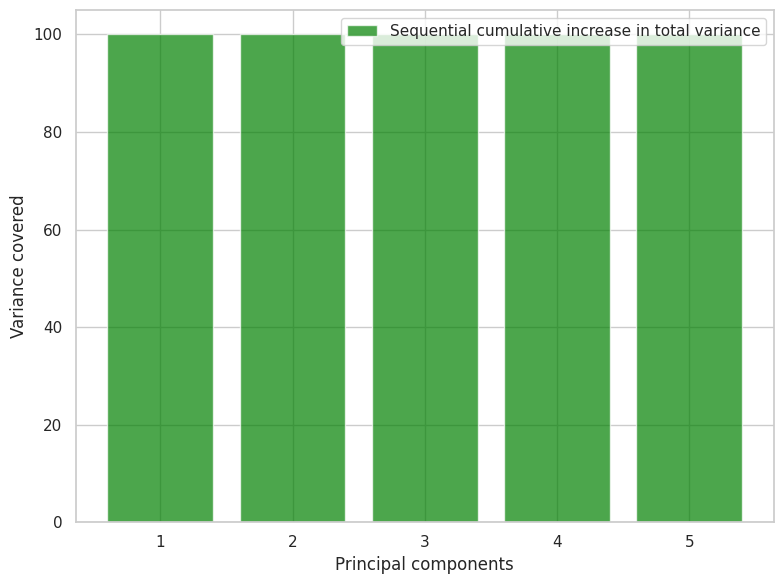

In [ ]:
import matplotlib.pyplot as plt

# Plot Sequential Cumulative Increase in Total Variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(e_values) + 1), total_variance, alpha=0.7, align='center',color='green', label='Sequential cumulative increase in total variance')
plt.ylabel('Variance covered')
plt.xlabel('Principal components')
plt.legend()
plt.tight_layout()
plt.show()


### 6. Visualization using Pair Plots

<Figure size 1200x1000 with 0 Axes>

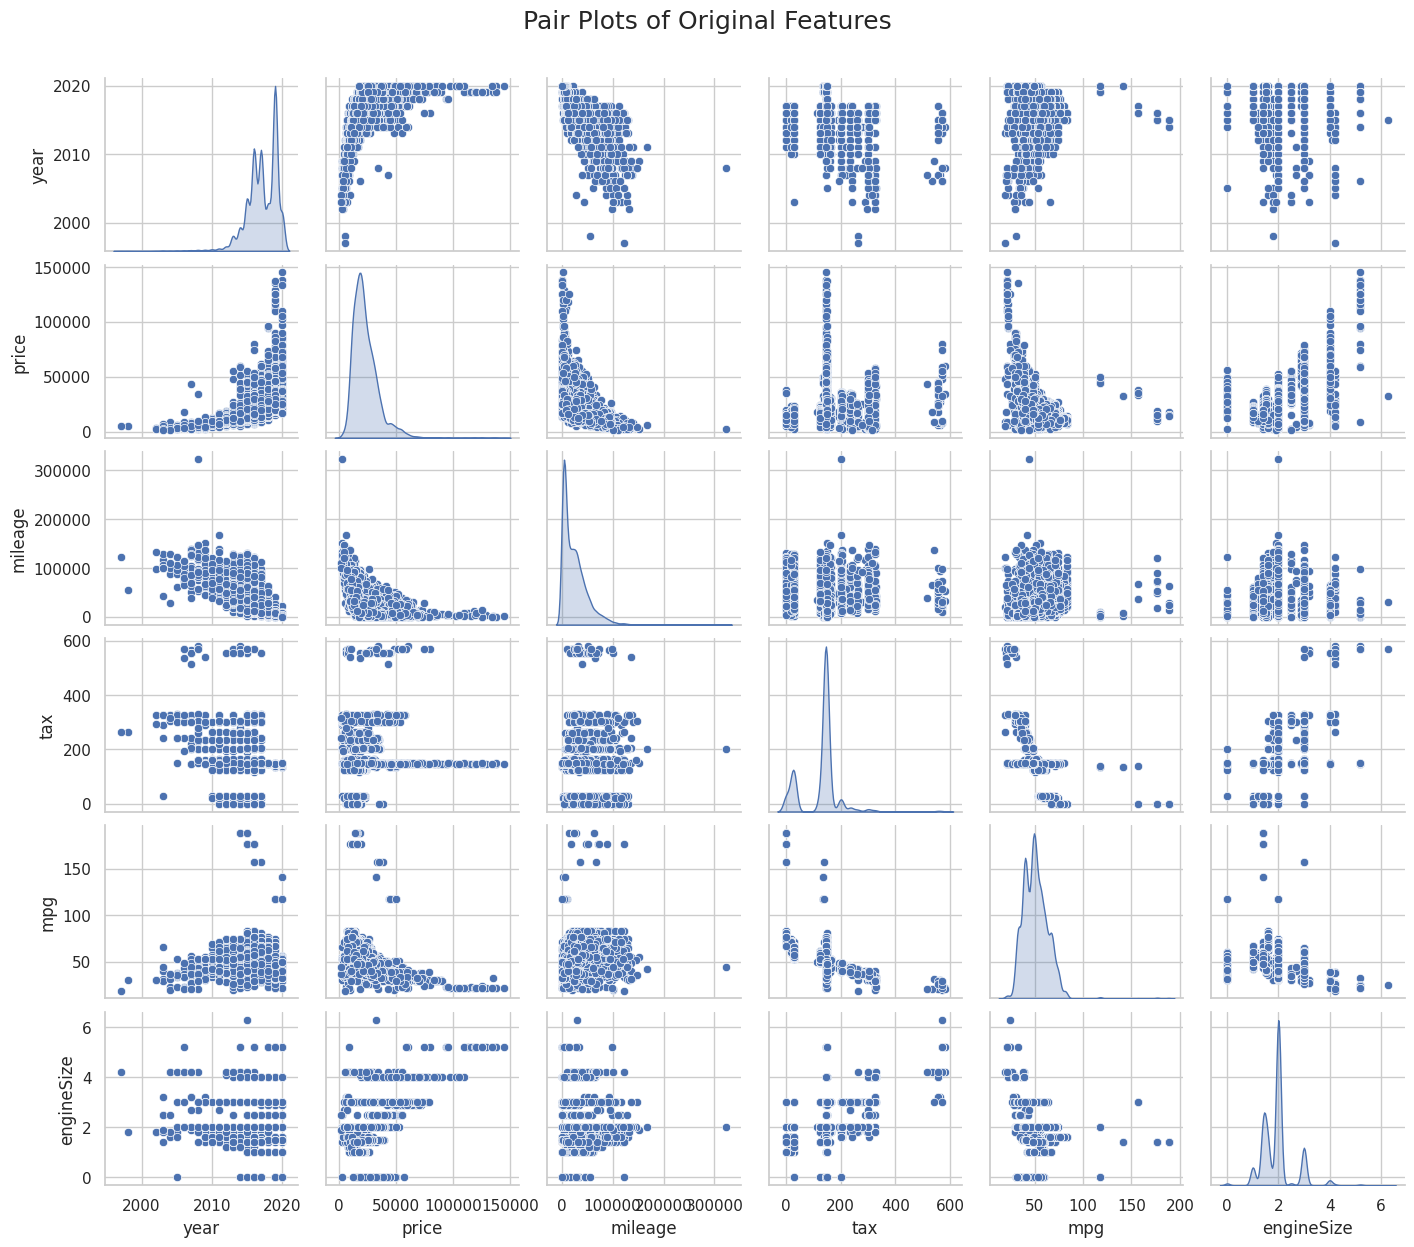

In [ ]:
import seaborn as sns

# Pair Plot of Original Features with Styling
plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')
sns.pairplot(car_data, height=2, aspect=1.2, markers='o', diag_kind='kde')
plt.suptitle('Pair Plots of Original Features', y=1.04, size=18)
plt.show()



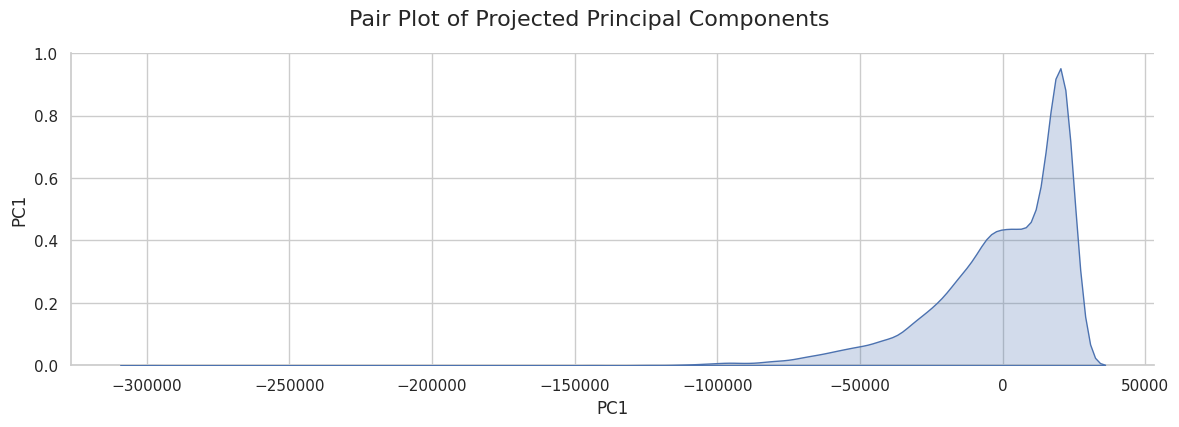

In [ ]:
# Pair Plot of Projected Principal Components
# Project the data onto the top k eigenvectors
projected_data = features.dot(top_k_eigenvectors)

# Create a DataFrame with the projected data onto the top k eigenvectors
projected_data_df = pd.DataFrame(projected_data, columns=[f'PC{i+1}' for i in range(k)])

# Pair Plot of Projected Principal Components with Styling
# plt.figure(figsize=(12, 10))
# sns.set(style='whitegrid')
sns.pairplot(projected_data_df, height=4, aspect=3, markers='o', diag_kind='kde')
plt.suptitle('Pair Plot of Projected Principal Components', y=1.05, size=16)
plt.subplots_adjust(top=0.94)
plt.show()

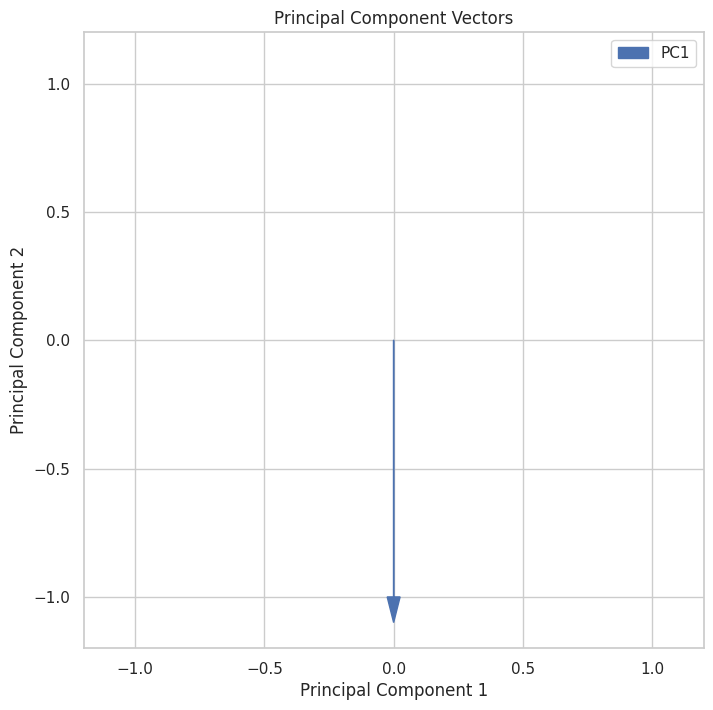

In [ ]:
# Visualizing principal components as vectors on the pair plots
def plot_principal_component_vectors(eigenvectors, feature_names):
    fig, ax = plt.subplots(figsize=(8, 8))

    for i, vector in enumerate(eigenvectors.T):
        ax.arrow(0, 0, vector[0], vector[1], head_width=0.05, head_length=0.1, fc=f'C{i}', ec=f'C{i}', label=f'PC{i+1}')

    ax.legend()
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('Principal Component Vectors')

    plt.show()

# Plot principal component vectors on the pair plot
plot_principal_component_vectors(top_k_eigenvectors, car_data.columns[1:])

### 7. Conclusion and Interpretation

The Principal Component Analysis (PCA) conducted on the dataset with five features, namely year, mileage, tax, mpg, and engineSize, yielded insightful results. The variance recorded by each principle component may be seen in the covariance matrix's eigenvalues, and the direction and magnitude of the original features in the new principal component space can be learned from the associated eigenvectors.

**1.   Eigenvalues and Variance:**

.The eigenvalues of the covariance matrix are [5.52497271e+08, 4.44392581e+03, 8.44121646e+01, 1.72584583e+00, 2.82457928e-01].

.These eigenvalues represent the amount of variance explained by each principal component.
The first principal component dominates, capturing the majority of the variance, followed by the subsequent components.

.Sequential variance increase highlights the dominance of the first principal component, explaining 99.99918% of the total variance.

**2.   Dimensionality Reduction and Insights:**

.Dimensionality reduction is effective, as a significant drop in variance occurs after the first component.

.This suggests that much of the original data's information can be retained with fewer dimensions.
Such reduction enhances computational efficiency and simplifies the interpretation of the dataset.

**3.   Visualizations and Data Representation:**

.The dominance of the first principal component indicates that a substantial amount of dataset variability can be captured by examining this single dimension.


In summary, PCA proves to be a powerful tool for uncovering dataset structure, emphasizing feature importance, and enabling efficient dimensionality reduction, thereby enhancing the overall understanding of the data.



## **Assignemnt 2 - B**

### 1. Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np

hitters_data = pd.read_excel('Hitters.xlsx')

print(hitters_data.head())
hitters_data.info()

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

In [ ]:
# Display the sum of null values in each column
null_counts = hitters_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [ ]:
# Dropping rows with null values of salary
hitters_data.dropna(subset=['Salary'], inplace=True)

# Display the modified DataFrame
print("\nDataFrame after dropping rows with null values in the 'Salary' column:")
print(hitters_data)


DataFrame after dropping rows with null values in the 'Salary' column:
     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
5      594   169      4    74   51     35     11    4408   1133      19   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks Le

In [ ]:
import pandas as pd

def get_unique_values(hitters_data):
    output_data = [
        [
            col,
            hitters_data[col].nunique(),
            hitters_data[col].unique() if hitters_data[col].nunique() <= 10 else "-",
            hitters_data[col].dtype,
        ]
        for col in hitters_data.columns
    ]

    output_df = pd.DataFrame(
        output_data,
        columns=["Column Name", "Number of Unique Values", " Unique Values ", "Data Type"],
    )

    return output_df

# Example usage
get_unique_values(hitters_data)


,Column Name,Number of Unique Values,Unique Values,Data Type
0,AtBat,209,-,int64
1,Hits,130,-,int64
2,HmRun,35,-,int64
3,Runs,92,-,int64
4,RBI,94,-,int64
5,Walks,87,-,int64
6,Years,21,-,int64
7,CAtBat,257,-,int64
8,CHits,241,-,int64
9,CHmRun,129,-,int64


In [ ]:
# Derive new stats by averaging them out
hitters_data = hitters_data.assign(
    AvgAtBat=hitters_data['CAtBat'] / hitters_data['Years'],
    AvgHits=hitters_data['CHits'] / hitters_data['Years'],
    AvgHmRun=hitters_data['CHmRun'] / hitters_data['Years'],
    AvgRuns=hitters_data['CRuns'] / hitters_data['Years'],
    AvgRBI=hitters_data['CRBI'] / hitters_data['Years'],
    AvgWalks=hitters_data['CWalks'] / hitters_data['Years']
)

# Replace 'A' with 1 and 'N' with 2 in the 'League' column
hitters_data['League'].replace(['A', 'N'], [1, 2], inplace=True)

# Display the updated DataFrame
hitters_data.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,Assists,Errors,Salary,NewLeague,AvgAtBat,AvgHits,AvgHmRun,AvgRuns,AvgRBI,AvgWalks
1,315,81,7,24,38,39,14,3449,835,69,...,43,10,475.0,N,246.357143,59.642857,4.928571,22.928571,29.571429,26.785714
2,479,130,18,66,72,76,3,1624,457,63,...,82,14,480.0,A,541.333333,152.333333,21.000000,74.666667,88.666667,87.666667
3,496,141,20,65,78,37,11,5628,1575,225,...,11,3,500.0,N,511.636364,143.181818,20.454545,75.272727,76.181818,32.181818
4,321,87,10,39,42,30,2,396,101,12,...,40,4,91.5,N,198.000000,50.500000,6.000000,24.000000,23.000000,16.500000
5,594,169,4,74,51,35,11,4408,1133,19,...,421,25,750.0,A,400.727273,103.000000,1.727273,45.545455,30.545455,17.636364


In [ ]:
# Drop specified columns to create cleaned_data
cleaned_data = hitters_data.drop(
    columns=['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'Years', 'NewLeague', 'Division']
)

# Separate features and target
features = cleaned_data.drop(columns='Salary')
target = cleaned_data['Salary']

# Display the cleaned_data, features, and target
print("Cleaned Data:")
print(cleaned_data.head())
print("\nFeatures:")
print(features.head())
print("\nTarget:")
print(target.head())

Cleaned Data:
   AtBat  Hits  HmRun  Runs  RBI  Walks  League  PutOuts  Assists  Errors  \
1    315    81      7    24   38     39       2      632       43      10   
2    479   130     18    66   72     76       1      880       82      14   
3    496   141     20    65   78     37       2      200       11       3   
4    321    87     10    39   42     30       2      805       40       4   
5    594   169      4    74   51     35       1      282      421      25   

   Salary    AvgAtBat     AvgHits   AvgHmRun    AvgRuns     AvgRBI   AvgWalks  
1   475.0  246.357143   59.642857   4.928571  22.928571  29.571429  26.785714  
2   480.0  541.333333  152.333333  21.000000  74.666667  88.666667  87.666667  
3   500.0  511.636364  143.181818  20.454545  75.272727  76.181818  32.181818  
4    91.5  198.000000   50.500000   6.000000  24.000000  23.000000  16.500000  
5   750.0  400.727273  103.000000   1.727273  45.545455  30.545455  17.636364  

Features:
   AtBat  Hits  HmRun  Runs  RBI

### 2. PCA Analysis

In [ ]:
# Calculate the mean of each column in features
mean = features.mean()

# Print the mean
print(mean)

# Get the column names
attr = mean.index

# Print the column names
print(attr)

# Center the dataset using vectorized operations
centered_dataset = features.sub(mean)

# Display the centered dataset
print(centered_dataset.head())


AtBat       403.642586
Hits        107.828897
HmRun        11.619772
Runs         54.745247
RBI          51.486692
Walks        41.114068
League        1.471483
PutOuts     290.711027
Assists     118.760456
Errors        8.593156
AvgAtBat    335.510010
AvgHits      89.926406
AvgHmRun      8.549680
AvgRuns      45.287435
AvgRBI       40.409564
AvgWalks     31.934871
dtype: float64
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'League', 'PutOuts',
       'Assists', 'Errors', 'AvgAtBat', 'AvgHits', 'AvgHmRun', 'AvgRuns',
       'AvgRBI', 'AvgWalks'],
      dtype='object')
        AtBat       Hits     HmRun       Runs        RBI      Walks    League  \
1  -88.642586 -26.828897 -4.619772 -30.745247 -13.486692  -2.114068  0.528517   
2   75.357414  22.171103  6.380228  11.254753  20.513308  34.885932 -0.471483   
3   92.357414  33.171103  8.380228  10.254753  26.513308  -4.114068  0.528517   
4  -82.642586 -20.828897 -1.619772 -15.745247  -9.486692 -11.114068  0.528517   
5  190.3

In [ ]:
# Calculate the covariance matrix
cov_matrix = centered_dataset.cov(numeric_only = True)

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

# Calculate eigenvalues and eigenvectors
e_values, e_vectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
e_indices = np.argsort(e_values)[::-1]
e_values = e_values[e_indices]
e_vec_sorted = e_vectors[:, e_indices]

# Print sorted eigenvalues and corresponding eigenvectors
print("\nSorted Eigenvalues:")
print(e_values)

# Calculate the sequential variance
sequential_variance = (e_values / np.sum(e_values)) * 100

# Print sequential variance
print("\nSequential Variance:")
print(sequential_variance)

Covariance Matrix:
                 AtBat         Hits       HmRun         Runs          RBI  \
AtBat     21699.413752  6407.778307  716.073506  3385.336081  3034.976141   
Hits       6407.778307  2036.295040  209.686602  1049.494413   920.915653   
HmRun       716.073506   209.686602   76.686936   141.143224   192.456753   
Runs       3385.336081  1049.494413  141.143224   652.282182   514.746597   
RBI        3034.976141   920.915653  192.456753   514.746597   669.914899   
Walks      1997.750849   575.584477   83.768728   386.616956   320.131295   
League      -11.285040    -3.464822   -0.976533    -2.631338    -2.405915   
PutOuts   12767.090979  3785.694642  615.137796  1938.651293  2261.053392   
Assists    7311.532377  1990.065727 -205.312803   664.209735   236.200998   
Errors      316.850216    83.437756   -0.563681    32.499013    25.675863   
AvgAtBat  12626.937478  3821.309450  457.081697  2036.989716  1849.989143   
AvgHits    3790.203098  1206.627879  135.101375   626.156

In [ ]:
no_components = int(input())

6


In [ ]:
# Get a list of values for k
k_s = list(range(1, no_components + 1))

# Use list comprehension to calculate total variance and project the data for each k
projected_data = [
    (
        f'Total variance covered with {k} components: {np.sum(sequential_variance[:k])} %',
        np.array(features).dot(e_vec_sorted[:, :k])
    )
    for k in k_s
]

# Print the results
for message, _ in projected_data:
    print(message)


Total variance covered with 1 components: 57.65611034897557 %
Total variance covered with 2 components: 82.82024793646774 %
Total variance covered with 3 components: 94.45126987120983 %
Total variance covered with 4 components: 99.23179967100585 %
Total variance covered with 5 components: 99.52016157879416 %
Total variance covered with 6 components: 99.72790052653676 %


### 3. Model Training and MSE/RMSE Calculation

In [ ]:
import random

# Learning rate and epochs lists
lr_values = [0.00000000000001] * len(k_s)
epochs_values = [5000] * len(k_s)

final_rmse = []
final_weights = []

# Code of ridge regression
def ridge_regression(X_poly, w, y_train, lrR, alpha):
    gradient = np.dot(X_poly.T, (X_poly.dot(w) - y_train)) + alpha * w
    w -= lrR * gradient
    return w

# Code for Root Mean Square Error
def RMSError(y_pred, y_train):
    mse = np.mean((y_pred - y_train) ** 2)
    return np.sqrt(mse)

# Generate polynomial features for the input matrix X up to the specified degree
def poly_features(X_train, degree):
    X_train_np = np.array(X_train)
    return np.column_stack([np.power(X_train_np.astype(float), d) for d in range(1, degree + 1)])

for k, lr, epoch in zip(k_s, lr_values, epochs_values):
    x = projected_data[k - 1][1]
    y = np.array(target)

    # Setting splitting ratio and getting the splitting index
    split_ratio = 0.9
    split_index = int(len(x) * split_ratio)

    # Splitting the data into training and testing sets (90% training, 10% testing)
    X_train, X_test = x[:split_index], x[split_index:]
    y_train, y_test = y[:split_index].reshape(-1, 1), y[split_index:].reshape(-1, 1)

    # Define the degree of the polynomial
    degree = 2

    # Create polynomial features
    X_poly_train = poly_features(X_train, degree)

    # Initialize weights
    weights = 0.00082 * np.ones((X_poly_train.shape[1], 1))

    # Ridge Regression with Stochastic Gradient Descent
    train_errors = []
    alpha = 0.1  # Regularization strength (you can adjust this)

    for _ in range(epoch):
        y_pred = X_poly_train.dot(weights)
        rmse = RMSError(y_pred, y_train)
        train_errors.append(rmse)

        index = random.randint(0, len(X_poly_train) - 1)
        weights = ridge_regression(X_poly_train, weights, y_train, lr, alpha)

    final_rmse.append(train_errors[-1])
    final_weights.append(weights)
    print(train_errors[-1])


545.3988000957265
418.46095358926004
373.7969627317336
373.6555662676367
373.6462396442414
373.66307637467844


### 4. Plotting Number of Components vs RMSE

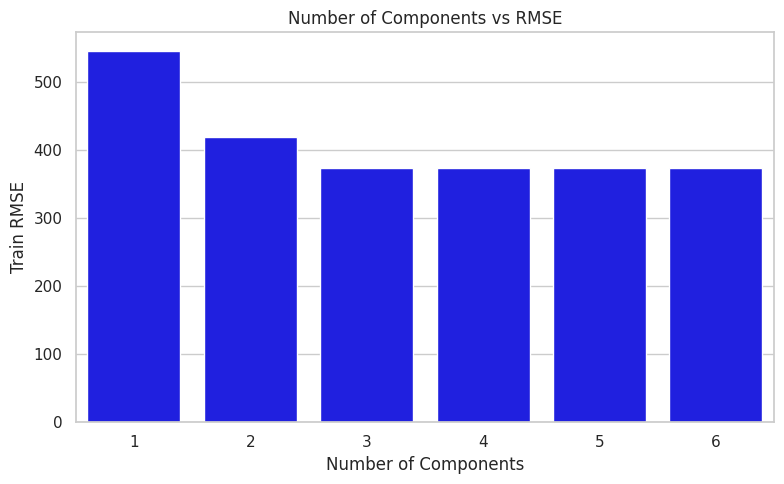

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=k_s, y=final_rmse, color='blue')
plt.xlabel('Number of Components')
plt.ylabel('Train RMSE')
plt.title('Number of Components vs RMSE')
plt.tight_layout()
plt.show()


In [ ]:
best_k = np.argmin(final_rmse) + 1
print(best_k)

5


### 5. Testing the Most Efficient Model

In [ ]:
x = projected_data[best_k - 1][1]
y = np.array(target)

# Setting splitting ratio and getting the splitting index
split_ratio = 0.9
split_index = int(len(x) * split_ratio)

# Splitting the data into training and testing sets (90% training, 10% testing)
X_test = x[split_index:]
y_test = y[split_index:].reshape(-1, 1)

# Evaluate the accuracy
X_test_p = poly_features(X_test, degree)
y_pred = np.dot(X_test_p, final_weights[best_k - 1])
rmse = RMSError(y_pred, y_test)

print(f"Testing RMSE for {best_k} compoments: {rmse}")


Testing RMSE for 5 compoments: 453.78534923470045


In [ ]:
# Printing a few actual and predicted values for comparison
print("Actual Values:")
print(y_test[:3])

print("Predicted Values:")
print(y_pred[:3])

Actual Values:
[[740.]
 [425.]
 [925.]]
Predicted Values:
[[1051.36709217]
 [ 173.64779442]
 [ 630.53560155]]


### 6. Conclusion and Analysis



**1.Eigenvalues and Variance Analysis:**

The covariance matrix eigenvalues, derived from a dataset featuring 16 distinct attributes, exhibit a descending magnitude order. This order signifies the variance explained by each corresponding principal component. The percentage of total variance, presented sequentially for each component, aids in comprehending the importance of dimensionality reduction.

*Sequential Variance:*

 .Component 1: 57.66%

 .Component 2: 82.82%

 .Component 3: 94.45%

 .Component 4: 99.23%

 .Component 5: 99.52%

 .Component 6: 99.73%


**2.RMSE Trend Analysis:**

The evaluation of Root Mean Square Error (RMSE) values across models with varying component numbers provides insights into the interplay between dimensionality reduction and predictive accuracy. As the number of components increases, RMSE generally decreases, hitting a minimum or stabilizing at 5 components. This trend indicates that a model with 5 components strikes a harmonious balance between capturing adequate variance and avoiding overfitting.

*RMSE:*

 .1 component: 545.40

 .2 components: 418.46

 .3 components: 373.80

 .4 components: 373.66

 .5 components: 373.65 (Minimum)

 .6 components: 373.66


**3.Optimal Model Selection Criteria:**

Identifying the point where RMSE attains a minimum or stabilizes (in this case, at 5 components) signifies the most efficient model. The selection of an optimal number of components plays a pivotal role in striking a balance between dimensionality reduction and predictive efficiency. The 5-component model captures a substantial variance percentage while maintaining a relatively low RMSE.


**4.Model Assessment and Prediction Insights:**

The RMSE for the chosen 5-component model on the testing dataset is 453.79, reflecting its predictive prowess on previously unseen data. A closer examination of actual and predicted values for specific instances validates the model's efficacy in approximating the target variable.

*Actual values: [740, 425, 925]*

*Predicted values: [1051.37, 173.65, 630.54]*


This research points to several optimization directions, such modifying the number of features, altering learning rates, or investigating different models. It is possible to reduce RMSE and improve the prediction power of the model by further improving these parameters.



Finally, the combined knowledge from the RMSE assessment and PCA analysis offers insightful viewpoints on model efficiency and dimensionality reduction. The careful choice of component count is essential to striking a balance between variance capture and prediction accuracy.
